**IMPORTING LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import spacy
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


**STOPWORDS**

We use stopwords , because in our text we have many in / is / our / punctuation.

These words doesn't provide benefit to our process
so we will be removing those words.

by removing these stopwords, our model performs more efficient

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))

**LOADING THE DATA**

In [ ]:
data = pd.read_csv("/content/vaccination_tweets.csv")

**LOAD FIRST 5 DATA**

In [ ]:
data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0.0,0.0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1.0,1.0,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0.0,0.0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446.0,2129.0,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0.0,0.0,False


**DATASET INFO**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10165 entries, 0 to 10164
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10165 non-null  int64  
 1   user_name         10165 non-null  object 
 2   user_location     8112 non-null   object 
 3   user_description  9534 non-null   object 
 4   user_created      10165 non-null  object 
 5   user_followers    10165 non-null  int64  
 6   user_friends      10165 non-null  int64  
 7   user_favourites   10165 non-null  int64  
 8   user_verified     10165 non-null  bool   
 9   date              10165 non-null  object 
 10  text              10165 non-null  object 
 11  hashtags          7788 non-null   object 
 12  source            10163 non-null  object 
 13  retweets          10164 non-null  float64
 14  favorites         10164 non-null  float64
 15  is_retweet        10164 non-null  object 
dtypes: bool(1), float64(2), int64(4), object

**CHECKING NULL VALUES**

In [ ]:
data.isnull().sum()

id                     0
user_name              0
user_location       2053
user_description     631
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            2377
source                 2
retweets               1
favorites              1
is_retweet             1
dtype: int64

**LIST OF COLUMN NAMES IN OUR DATASET**

In [ ]:
data.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

**ROWS AND COLUMN OF DATASET**

In [ ]:
data.shape

(10165, 16)

REMOVING THE COLUMNS

In [ ]:
data.drop(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'], axis=1, inplace=True)

In [ ]:
data.head()

,text
0,Same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,"Facts are immutable, Senator, even when you're..."
4,Explain to me again why we need a vaccine @Bor...


In [ ]:
data.columns

Index(['text'], dtype='object')

**FIRST TWEET**

In [ ]:
data['text'][1]

"While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm"

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10165 entries, 0 to 10164
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10165 non-null  object
dtypes: object(1)
memory usage: 79.5+ KB


**PREPROCESSING**

In this step we will be removing some unecessary words like URL , SPECIAL CHARACTERS , @ , # ,..

For this we will using re library( Regular Expression )

Then we our doing tokenization + removing stop words

Tokenization is the process of splitting text into meaningful segments

In [ ]:
def preprocess(text):
  text = text.lower()
  text = re.sub(r"https\S+|www\S+https\S+", '',text)
  text = re.sub(r'\@w+|\#','',text)
  text = re.sub(r'[^\w\s]','',text)
  text_tokens = word_tokenize(text)
  text_tokens = word_tokenize(text)
  filtered_text = [w for w in text_tokens if not w in stop_words]
  return " ".join(filtered_text)

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data['text'] = data['text'].apply(preprocess)

In [ ]:
data = data.drop_duplicates('text')

**STEMMING**

Stemming is the process were we use simple rules such as remove ing , able

to derive base word

why we are not using lemmetization means,

for example there is a word ability

and if u do stemming over ability it gives ability

but if u do lemmetization it gives abil instead of ability

it removes the last word lity

in simple words lemmitization does know language knowledge

were stemming doesn't have the language knowledge

In [ ]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [ ]:
data['text'] = data['text'].apply(lambda x: stemming(x))

In [ ]:
data.head()

,text
0,folks said daikon paste could treat cytokine s...
1,world wrong side history year hopefully bigges...
2,coronavirus sputnikv astrazeneca pfizerbiontec...
3,facts immutable senator even youre ethically s...
4,explain need vaccine borisjohnson matthancock ...


In [ ]:
data['text'][1]

'world wrong side history year hopefully biggest vaccination effort weve ev'

**POLARITY**

In [ ]:
from textblob import TextBlob

In [ ]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [ ]:
data['polarity'] = data['text'].apply(polarity)

In [ ]:
data.head(10)

,text,polarity
0,folks said daikon paste could treat cytokine s...,0.000
1,world wrong side history year hopefully bigges...,-0.500
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.000
3,facts immutable senator even youre ethically s...,0.100
4,explain need vaccine borisjohnson matthancock ...,0.000
5,anyone useful adviceguidance whether covid vac...,0.400
6,bit sad claim fame success vaccination patriot...,-0.100
7,many bright days 2020 best 1 bidenharris winni...,0.675
8,covid vaccine getting covidvaccine covid19 pfi...,0.000
9,covidvaccine states start getting covid19vacci...,0.000


Then we are creating a column sentiment

based on the polarity value it assigns the label

In [ ]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [ ]:
data['sentiment'] = data['polarity'].apply(sentiment)

In [ ]:
data.head(10)

,text,polarity,sentiment
0,folks said daikon paste could treat cytokine s...,0.000,Neutral
1,world wrong side history year hopefully bigges...,-0.500,Negative
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.000,Neutral
3,facts immutable senator even youre ethically s...,0.100,Positive
4,explain need vaccine borisjohnson matthancock ...,0.000,Neutral
5,anyone useful adviceguidance whether covid vac...,0.400,Positive
6,bit sad claim fame success vaccination patriot...,-0.100,Negative
7,many bright days 2020 best 1 bidenharris winni...,0.675,Positive
8,covid vaccine getting covidvaccine covid19 pfi...,0.000,Neutral
9,covidvaccine states start getting covid19vacci...,0.000,Neutral


<AxesSubplot:xlabel='sentiment', ylabel='count'>

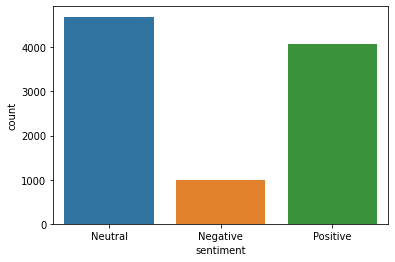

In [ ]:
sns.countplot(x='sentiment', data = data)

listing out the text with positive sentiment

In [ ]:
pos_tweets = data[data.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,text,polarity,sentiment
8935,numbertwo magnificent vaccinatedactor vaxxedan...,1.0,Positive
5942,vaccines work excellent news thelancet study p...,1.0,Positive
4417,best feeling got covidvaccine lets keep going ...,1.0,Positive
2340,applying emotion pfizerbiontech based best evi...,1.0,Positive
9456,lets break according cdcgov perfectly acceptab...,1.0,Positive


listing out the text with negative sentiment

In [ ]:
neg_tweets = data[data.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,text,polarity,sentiment
2912,work skilled nursing facility got first vaccin...,-0.003333,Negative
7256,200321 752308 vaccinations new daily record da...,-0.003409,Negative
2073,ukgovernment cant even vaccinate properly ethi...,-0.004762,Negative
7715,got first dose less waiting time airport vacci...,-0.005556,Negative
7157,nas_k27 second dose due end next month well fa...,-0.006250,Negative


listing out the text with neutral sentiment

In [ ]:
neutral_tweets = data[data.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,text,polarity,sentiment
0,folks said daikon paste could treat cytokine s...,0.0,Neutral
6826,opportunity arises please get vaccine got pfiz...,0.0,Neutral
6868,experience pfizer leads state israel conducted...,0.0,Neutral
6865,predawn dispatch xalapa mexico alls well sunbu...,0.0,Neutral
6862,skeersmaecker course member states agree diffe...,0.0,Neutral


**ENCODING**

now we are going to convert categorical value to numerical

As we know ml model doesn't deal with categorical value

for that reason we will converting them to numerical value

there are many technique like,
                1) one hot encoding
                2) bag of words
                3) TF IDF ,....

we are not going to use one hot encoding
it has some drawbacks

we will be using bag of words

In [ ]:
vect = CountVectorizer(ngram_range=(1,2)).fit(data['text'])

In [ ]:
X = data['text']
Y = data['sentiment']
X = vect.transform(X)

**SPLIT TRAIN TEST DATASET**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

**MACHINE LEARING**

we will be using some classification model
as this problem deals with classifying whether the tweets is positive | neutral | negative

Models : 1) Logistic Regression
         2) SVM
         3) Decision Tree

**LOGISTIC REGRESSION**

In [ ]:
log = LogisticRegression()

In [ ]:
log.fit(x_train,y_train)

LogisticRegression()

In [ ]:
score = log.score(x_test,y_test)
score = score * 100
print(score)

83.61495135688683


We got Accuracy : 83%

In [ ]:
log.predict(x_test)

array(['Positive', 'Positive', 'Positive', ..., 'Neutral', 'Positive',
       'Positive'], dtype=object)

**SVM**

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC()

In [ ]:
svm.fit(x_train,y_train)

SVC()

In [ ]:
scoree = svm.score(x_test,y_test)
scoree = scoree * 100
print(scoree)

77.00972862263184


We got Accuracy : 77%

In [ ]:
svm.predict(x_test)

array(['Positive', 'Positive', 'Positive', ..., 'Neutral', 'Positive',
       'Positive'], dtype=object)

**DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
scoreee = dt.score(x_test,y_test)
scoreee = scoreee * 100
print(scoreee)

90.42498719918075


We got Accuracy : 90%

In [ ]:
dt.predict(x_test)

array(['Positive', 'Positive', 'Positive', ..., 'Neutral', 'Positive',
       'Positive'], dtype=object)